In [1]:
%matplotlib inline

import cv2, matplotlib
import numpy as np
from skimage.morphology import (
    skeletonize,
    skeletonize_3d,
    medial_axis,
    thin,
    local_minima,
    local_maxima,
)
from skimage.transform import rescale, resize, downscale_local_mean
from scipy.ndimage import distance_transform_edt

from math import sqrt

import matplotlib.pyplot as plt

from os.path import expanduser, splitext
from os import scandir, makedirs

# import random

import csv

from tqdm import tnrange, tqdm_notebook

from pathlib import Path

debug = False  # plot every steps

In [2]:
from floorplan_analysis import read_bgr_from_image_unicode
from floorplan_analysis import read_from_csv

from floorplan_analysis import get_unit_mask

from floorplan_analysis import align_fp, rescale_fp
from floorplan_analysis import mono_fp
from floorplan_analysis import read_mono_from_image_unicode, save_mono_to_image_unicode

# process files

In [3]:
def process_floorplan_mono(
    path_from, area, filename_to, dir_to="/data/fp_img_processed/", ext_to=".png"
):
    try:
        bgr = read_bgr_from_image_unicode(path_from)
        unit_comb = get_unit_mask(bgr)
        unit_comb = rescale_fp(unit_comb, area)
        unit_comb = align_fp(unit_comb)

        mono = mono_fp(unit_comb)
        save_mono_to_image_unicode(mono, dir_to + filename_to + ext_to, ext_to)
    except:
        pass

In [4]:
process_floorplan_mono("/fp_img/10001_57B.jpg", 85, "mono", dir_to="")

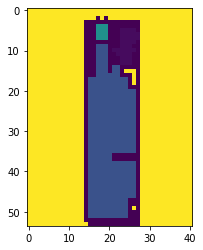

In [5]:
plt.imshow(read_mono_from_image_unicode("mono.png"))

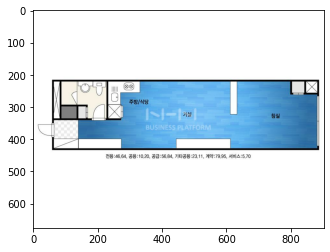

In [6]:
bgr = read_bgr_from_image_unicode("/fp_img/10001_57B.jpg")
plt.imshow(bgr)

In [7]:
unit_comb = get_unit_mask(bgr)

In [8]:
unit_comb = rescale_fp(unit_comb, 85)

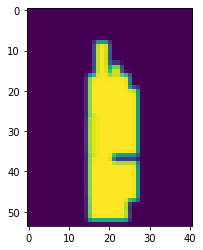

In [9]:
unit_comb = align_fp(unit_comb)
plt.imshow(unit_comb[:, :, 2])

In [10]:
mono = mono_fp(unit_comb)

# multiprocessing

In [11]:
from multiprocessing import Pool


def worker(x, y):
    return x * y


with Pool(7) as p:
    output = p.starmap(worker, [(i, 2 * i) for i in range(101)], chunksize=100)

print(output)

[0, 2, 8, 18, 32, 50, 72, 98, 128, 162, 200, 242, 288, 338, 392, 450, 512, 578, 648, 722, 800, 882, 968, 1058, 1152, 1250, 1352, 1458, 1568, 1682, 1800, 1922, 2048, 2178, 2312, 2450, 2592, 2738, 2888, 3042, 3200, 3362, 3528, 3698, 3872, 4050, 4232, 4418, 4608, 4802, 5000, 5202, 5408, 5618, 5832, 6050, 6272, 6498, 6728, 6962, 7200, 7442, 7688, 7938, 8192, 8450, 8712, 8978, 9248, 9522, 9800, 10082, 10368, 10658, 10952, 11250, 11552, 11858, 12168, 12482, 12800, 13122, 13448, 13778, 14112, 14450, 14792, 15138, 15488, 15842, 16200, 16562, 16928, 17298, 17672, 18050, 18432, 18818, 19208, 19602, 20000]


# main

In [12]:
dir_ID_from = "/fp_img/"
dir_IDs_exclude = "/data/exclude/"

dir_from = "/fp_img/"

dir_to = "/data/fp_img_processed/"
makedirs(dir_to, exist_ok=True)

ext_to = ".png"

### all of the plans
ID_ext_dict = {
    splitext(f.name)[0]: splitext(f.name)[1]
    for f in scandir(dir_ID_from)
    if f.is_file()
}
print(len(ID_ext_dict.keys()), "floorplans")

51551 floorplans


In [13]:
list(ID_ext_dict.items())[:10]

[('19679_64G', '.jpg'),
 ('883_153', '.jpg'),
 ('11545_171', '.jpg'),
 ('9251_67', '.jpg'),
 ('10784_242', '.jpg'),
 ('26462_151', '.jpg'),
 ('19073_116B', '.jpg'),
 ('106721_165C', '.jpg'),
 ('103551_117B', '.jpg'),
 ('24036_77', '.jpg')]

In [14]:
files_IDs_exclude = list(Path(expanduser(dir_IDs_exclude)).glob("*.csv"))
print(files_IDs_exclude)

[PosixPath('/data/exclude/fp_img_multi-level.csv'), PosixPath('/data/exclude/fp_img_multi-unit.csv'), PosixPath('/data/exclude/fp_img_exclude.csv')]


In [15]:
IDs_excl = set()
for file_excl in files_IDs_exclude:
    _, file_excl_list = read_from_csv(str(file_excl))
    if file_excl_list:
        list_excl = [row[0] for row in file_excl_list]
    IDs_excl |= set(list_excl)
    print(file_excl, "processed:", len(list_excl), "floorplans to exclude")

# _, fp_img_processed_list = read_from_csv(exp_path_fp_img)
# if fp_img_processed_list:
#     list_excl = [row[0] for row in fp_img_processed_list]
#     IDs_excl |= set(list_excl)
#     print(len(list_excl), "floorplans already processed")

/data/exclude/fp_img_multi-level.csv processed: 861 floorplans to exclude
/data/exclude/fp_img_multi-unit.csv processed: 15 floorplans to exclude
/data/exclude/fp_img_exclude.csv processed: 861 floorplans to exclude


In [16]:
import pandas as pd

path_csv = "/data/fp_refined.csv"

df = pd.read_csv(path_csv)
df = df.set_index("id_after")
df

,Path,index,APT_ID,Date,year,norm_year,yyyymm,N_Housings,Max_Floors,Min_Floors,...,sido_cluster_code,sido_sgg_name,FP_ID,Area,norm_log_area,area_85,Entrance,Rooms,Baths,N_Units
id_after,,,,,,,,,,,,,,,,,,,,,
8928_160,/data/fp_img_processed/8928_160.png,1,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,20,...,0,서울시 강남구,160,134.30,1.313282,False,계단식,4,2,84
8928_183,/data/fp_img_processed/8928_183.png,2,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,20,...,0,서울시 강남구,183,153.80,1.702528,False,계단식,4,2,44
8928_201A,/data/fp_img_processed/8928_201A.png,3,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,20,...,0,서울시 강남구,201A,170.32,1.995448,False,계단식,4,2,42
8928_204B,/data/fp_img_processed/8928_204B.png,4,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,20,...,0,서울시 강남구,204B,168.42,1.963240,False,계단식,4,2,42
960_35,/data/fp_img_processed/960_35.png,5,960,1982-11-01T00:00:00Z,1982,0.26,198211,5040,5,5,...,0,서울시 강남구,35,35.64,-2.495452,False,계단식,2,1,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115454_21D,/data/fp_img_processed/115454_21D.png,50577,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,4,...,8,제주도 제주시,21D,14.50,-5.077429,False,계단식,2,1,20
115454_34E,/data/fp_img_processed/115454_34E.png,50578,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,4,...,8,제주도 제주시,34E,21.57,-3.937185,False,계단식,2,1,4
115454_36B,/data/fp_img_processed/115454_36B.png,50579,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,4,...,8,제주도 제주시,36B,24.86,-3.529623,False,계단식,3,2,16


In [17]:
ID_set = set(ID_ext_dict.keys()).difference(IDs_excl)
ID_set = ID_set.intersection(df.index)
IDs = list(ID_set)
print(len(IDs), "floorplans to go")

50540 floorplans to go


In [18]:
paths_from = [dir_from + ID + ID_ext_dict[ID] for ID in IDs]
print(paths_from[:10])

['/fp_img/2076_172.jpg', '/fp_img/6112_74.jpg', '/fp_img/102038_99A.jpg', '/fp_img/102967_90.jpg', '/fp_img/18966_104D.jpg', '/fp_img/22354_208.jpg', '/fp_img/2888_153A.jpg', '/fp_img/2860_142.jpg', '/fp_img/108423_115D.jpg', '/fp_img/1760_86.jpg']


In [19]:
df.Area

id_after
8928_160      134.30
8928_183      153.80
8928_201A     170.32
8928_204B     168.42
960_35         35.64
               ...  
115454_21D     14.50
115454_34E     21.57
115454_36B     24.86
115454_37A     25.67
115454_38C     25.21
Name: Area, Length: 50540, dtype: float64

In [20]:
area_list = [df.Area[ID] for ID in IDs]
area_list[:10]

[149.31, 59.64, 74.95, 66.26, 84.86, 166.37, 128.11, 119.87, 84.93, 61.88]

In [ ]:
from multiprocessing import Pool

makedirs(dir_to, exist_ok=True)

with Pool(7) as p:
    p.starmap(process_floorplan_mono, zip(paths_from, area_list, IDs))

    ls /data/fp_img_processed/ | wc -l